<a href="https://colab.research.google.com/github/ThangDoan2001/TensorFlow_ZeroToHero/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow 

There are many definitions for a regression problem but in our case, we're going to simplify it: predecting a numerical variable based on some other combination of variables, even shorter .... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.5.0'

## Creating some data to view and fit

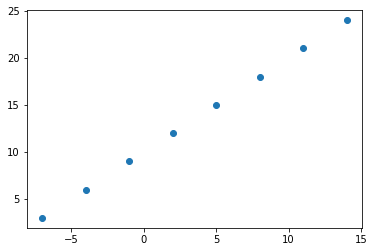

In [2]:
 import numpy as np
 import matplotlib.pyplot as plt

 # Create features
 X = np.array([-7., -4., -1., 2., 5. , 8., 11., 14.])


 # Create lables
 y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

 # Visualize it
 plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and out put shape

In [4]:
# Create a demo tensor for our housing preice predictions problem
house_info = tf.constant(["bedroom", "bathroom", "gargage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'gargage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

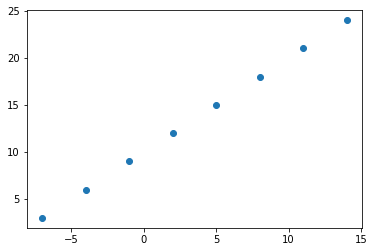

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

---
1. **Creating a model** - define the input and ouput layers, as well as the hidden layers of a deep learning model.
2. **Compliling a model** - define the loss function ( in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels)


In [13]:
# Set random seed
tf.random.set_seed(59)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE,     # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 13.2553 - mae: 13.2553
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 13.1228 - mae: 13.1228
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 12.9903 - mae: 12.9903
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 12.8578 - mae: 12.8578
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 12.7253 - mae: 12.7253


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])

In [16]:
y_pred + 11

array([[15.2136755]], dtype=float32)

## Improving our model

We can imporve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) withnin each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more  **epochs** (leave it training for longer) or on more data (give the model more examples to learn from. 


In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 191ms/step - loss: 10.3864 - mae: 10.3864
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2539 - mae: 10.2539
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1214 - mae: 10.1214
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9889 - mae: 9.9889
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 9.8564 - mae: 9.8564
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.7239 - mae: 9.7239
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.5914 - mae: 9.5914
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4589 - mae: 9.4589
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3264 - mae: 9.3264
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 9.1939 - mae: 9.1939
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see of our model's prediction has improved....
model.predict([17.])

array([[30.21327]], dtype=float32)

In [20]:
# Let's change optimizer to Adam

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model (this time we change the optimizer to Adam. We also add learning rate into it)
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 236ms/step - loss: 8.4911 - mae: 8.4911
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4907 - mae: 8.4907
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4902 - mae: 8.4902
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4898 - mae: 8.4898
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 8.4893 - mae: 8.4893
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4889 - mae: 8.4889
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.4884 - mae: 8.4884
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4880 - mae: 8.4880
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4875 - mae: 8.4875
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4871 - mae: 8.4871
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 8.486

In [21]:
model.predict([17.])

array([[24.50885]], dtype=float32)

In [22]:
# Let's do it one more time. this time we will add more hidden layers

# 1. Create the model (this time we add 3 more hidden layers)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 343ms/step - loss: 12.4450 - mae: 12.4450
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.1035 - mae: 12.1035
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7671 - mae: 11.7671
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4332 - mae: 11.4332
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0918 - mae: 11.0918
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7424 - mae: 10.7424
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4482 - mae: 10.4482
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1831 - mae: 10.1831
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9015 - mae: 9.9015
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 9.6097 - mae: 9.6097
Epoch 11/100
1/1 [==============================] - 0s 4ms/st

In [23]:
model.predict([17.])

array([[31.127031]], dtype=float32)

**Common ways to improve a deep model:**
* Adding layers
* Increase the number of hidden units
* Change the activation functions 
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

## Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is :
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model ....
```

When it comes to evaluation... there are 3 words you should memorize:

>"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what date are we working with? What does this look like?

* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how the predictions of a model line up against the ground truth (the original labels)

In [24]:
# Make a bigger dataset \
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

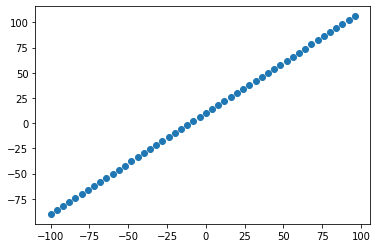

In [26]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets....

* **Training set** - the model learns form this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data) 
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data) 
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visaulize it again!

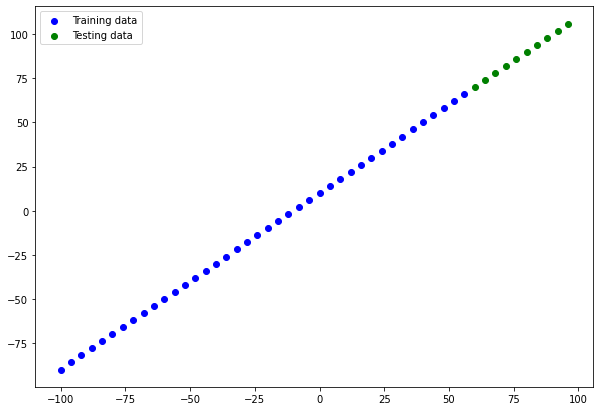

In [29]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") 
# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Conpile the model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [32]:
model.summary()

ValueError: ignored

In [34]:
X[0].shape

TensorShape([])

In [33]:
# Let's create a model which builds automatically by defining the input shape argumentr in the first layer
tf.random.set_seed(42)
# 1. Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - there are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameter aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

**Resource** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

**Exercise** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [64]:
# 1. Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Let;s fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [60]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


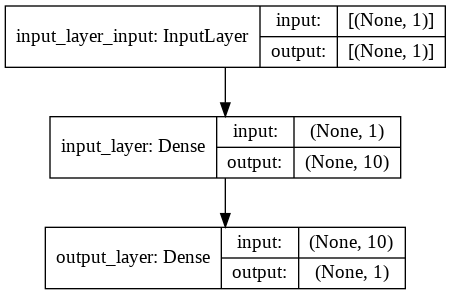

In [51]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` ( ground truth versus your model predictions)



In [66]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 76.49255],
       [ 81.4774 ],
       [ 86.46225],
       [ 91.44711],
       [ 96.43196],
       [101.41681],
       [106.40166],
       [111.38651],
       [116.37137],
       [121.35622]], dtype=float32)

In [68]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [71]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  """
  Plots training data, test data and compares predictions with ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, y_pred, c="r", label="Predictions")
  # Show the ledeng
  plt.legend()
  plt.show()


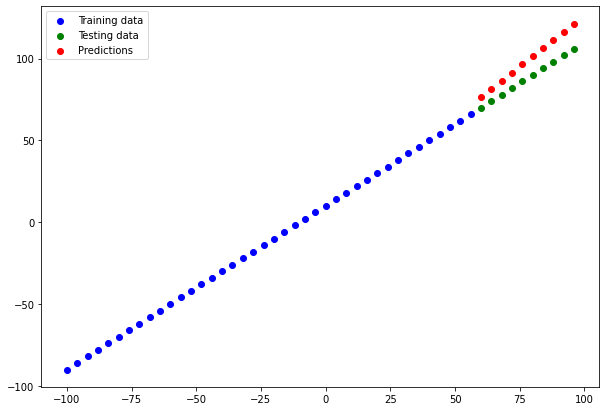

In [73]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's preformance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [75]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 10.9244 - mae: 10.9244


[10.924384117126465, 10.924384117126465]

In [79]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.304468, 11.009039, 10.      , 10.289423, 11.772784, 14.450086,
       18.401657, 23.386513, 28.371368, 33.356216], dtype=float32)>

In [81]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.49255],
       [ 81.4774 ],
       [ 86.46225],
       [ 91.44711],
       [ 96.43196],
       [101.41681],
       [106.40166],
       [111.38651],
       [116.37137],
       [121.35622]], dtype=float32)>

In [80]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [83]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.49255,  81.4774 ,  86.46225,  91.44711,  96.43196, 101.41681,
       106.40166, 111.38651, 116.37137, 121.35622], dtype=float32)>

In [88]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.924384>

In [90]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=127.34412>